# Term Deposit Prediction | Data Exploration

A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time. For more information with regards to Term Deposits please click on this link from Investopedia : [Investopedia](https://www.investopedia.com/terms/t/termdeposit.asp)<br>

This datasets can be used for 3 different business goals:

1. Searching the best modelling possible to predict customer potential to open term deposit.
2. Prediction of the results of the marketing campaign for each customer and clarification of factors which affect the campaign results. This helps to find out the ways how to make marketing campaigns more efficient.
3. Finding out customer segments, using data for customers, who subscribed to term deposit. This helps to identify the profile of a customer, who is more likely to acquire the product and develop more targeted marketing campaigns.

Use this prediction to optimize marketing campaigns to attract more customers to open term deposit. 

Detailed description of the dataset's content is describe in this source [Datasets Source](https://www.kaggle.com/janiobachmann/bank-marketing-dataset)
    

##### __Data Description__

- __`age`__: (numeric)
- __`job`__: type of job(categorical:'admin.', 'bluecollar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
-__`marital`__: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
-__`education`__: (categorical: primary, secondary, tertiary and unknown)
-__`default`__: has credit in default? (categorical: 'no','yes','unknown')
-__`housing`__: has housing loan? (categorical: 'no','yes','unknown')
-__`loan`__: has personal loan? (categorical: 'no','yes','unknown')
-__`balance`__: Balance of the individual.
-__`contact`__: contact communication type (categorical: 'cellular','telephone')
-__`month`__: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
-__`day`__: last contact day of the month (numeric: 1,2,3,....29,30)
-__`duration`__: last contact duration, in seconds (numeric)
-__`campaign`__: number of contacts performed during this campaign and for this client (numeric, includes last contact)
-__`pdays`__: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
-__`previous`__: number of contacts performed before this campaign and for this client (numeric)
-__`poutcome`__: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
-__`deposit`__ : has the client subscribed a term deposit? (binary: 'yes','no')

<hr>

### __Import Library & Data__

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statistics as st
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler, MaxAbsScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
data = pd.read_csv('bank.csv')
data

age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0       unknown    5   may      1042         1     -1         0  unknown   
1       unknown    5   may      1467         1     -1         0  unknown   
2       unknown    5   may      1389         1     -1         0  unknown   
3       unknown    5   may       579         1     -1         0  unknown   
4       unknown    5   may       673         2     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11157  cellular   20   apr       257         1     -1         0  unknown   
11158   unknown   16   jun        83         4     -1         0  unknown   
11159  cellular   19   aug       156         2     -1         0  unknown   
11160  cellular    8   may         9         2    172         5  failure   
11161  cellular    9   jul       628         1     -1         0  unknown   

      deposit  
0         yes  
1         yes  
2         yes  
3         yes  
4         yes  
...       ...  
11157      no  
11158      no  
11159      no  
11160      no  
11161      no  

[11162 rows x 17 columns]

### __Find NaN Value & Outliers__

In [3]:
data.shape

(11162, 17)

In [4]:
data.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    return mis_val_table_ren_columns

missing_values(data)

Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

Fortunetaly, we see that there are no missing values.

In [7]:
listkolom=[]
for i in (data.columns):
    listkolom.append(i)
    
listtipe=[]
for i in (data.columns):
    listtipe.append(data[i].dtypes)
    
nullmany = data.isnull().sum().values

nullpctx = []
for i in nullmany:
    nullpctx.append(round(i/len(data),4)*100)
    
unik = data.nunique().values

samp = []
for i in data.columns:
    samp.append(data[i].sample().values)
    
pd.DataFrame({
    'dataFeatures' : listkolom,
    'dataType' : listtipe,
    'null' : nullmany,
    'nullpct' : nullpctx,
    'unique' : unik,
    'SampleValue' : samp
})

dataFeatures dataType  null  nullpct  unique SampleValue
0           age    int64     0      0.0      76        [56]
1           job   object     0      0.0      12  [services]
2       marital   object     0      0.0       3    [single]
3     education   object     0      0.0       4   [primary]
4       default   object     0      0.0       2        [no]
5       balance    int64     0      0.0    3805         [0]
6       housing   object     0      0.0       2       [yes]
7          loan   object     0      0.0       2        [no]
8       contact   object     0      0.0       3   [unknown]
9           day    int64     0      0.0      31        [16]
10        month   object     0      0.0      12       [jul]
11     duration    int64     0      0.0    1428        [99]
12     campaign    int64     0      0.0      36         [2]
13        pdays    int64     0      0.0     472        [-1]
14     previous    int64     0      0.0      34         [0]
15     poutcome   object     0      0.0       4   [unknown]
16      deposit   object     0      0.0       2       [yes]

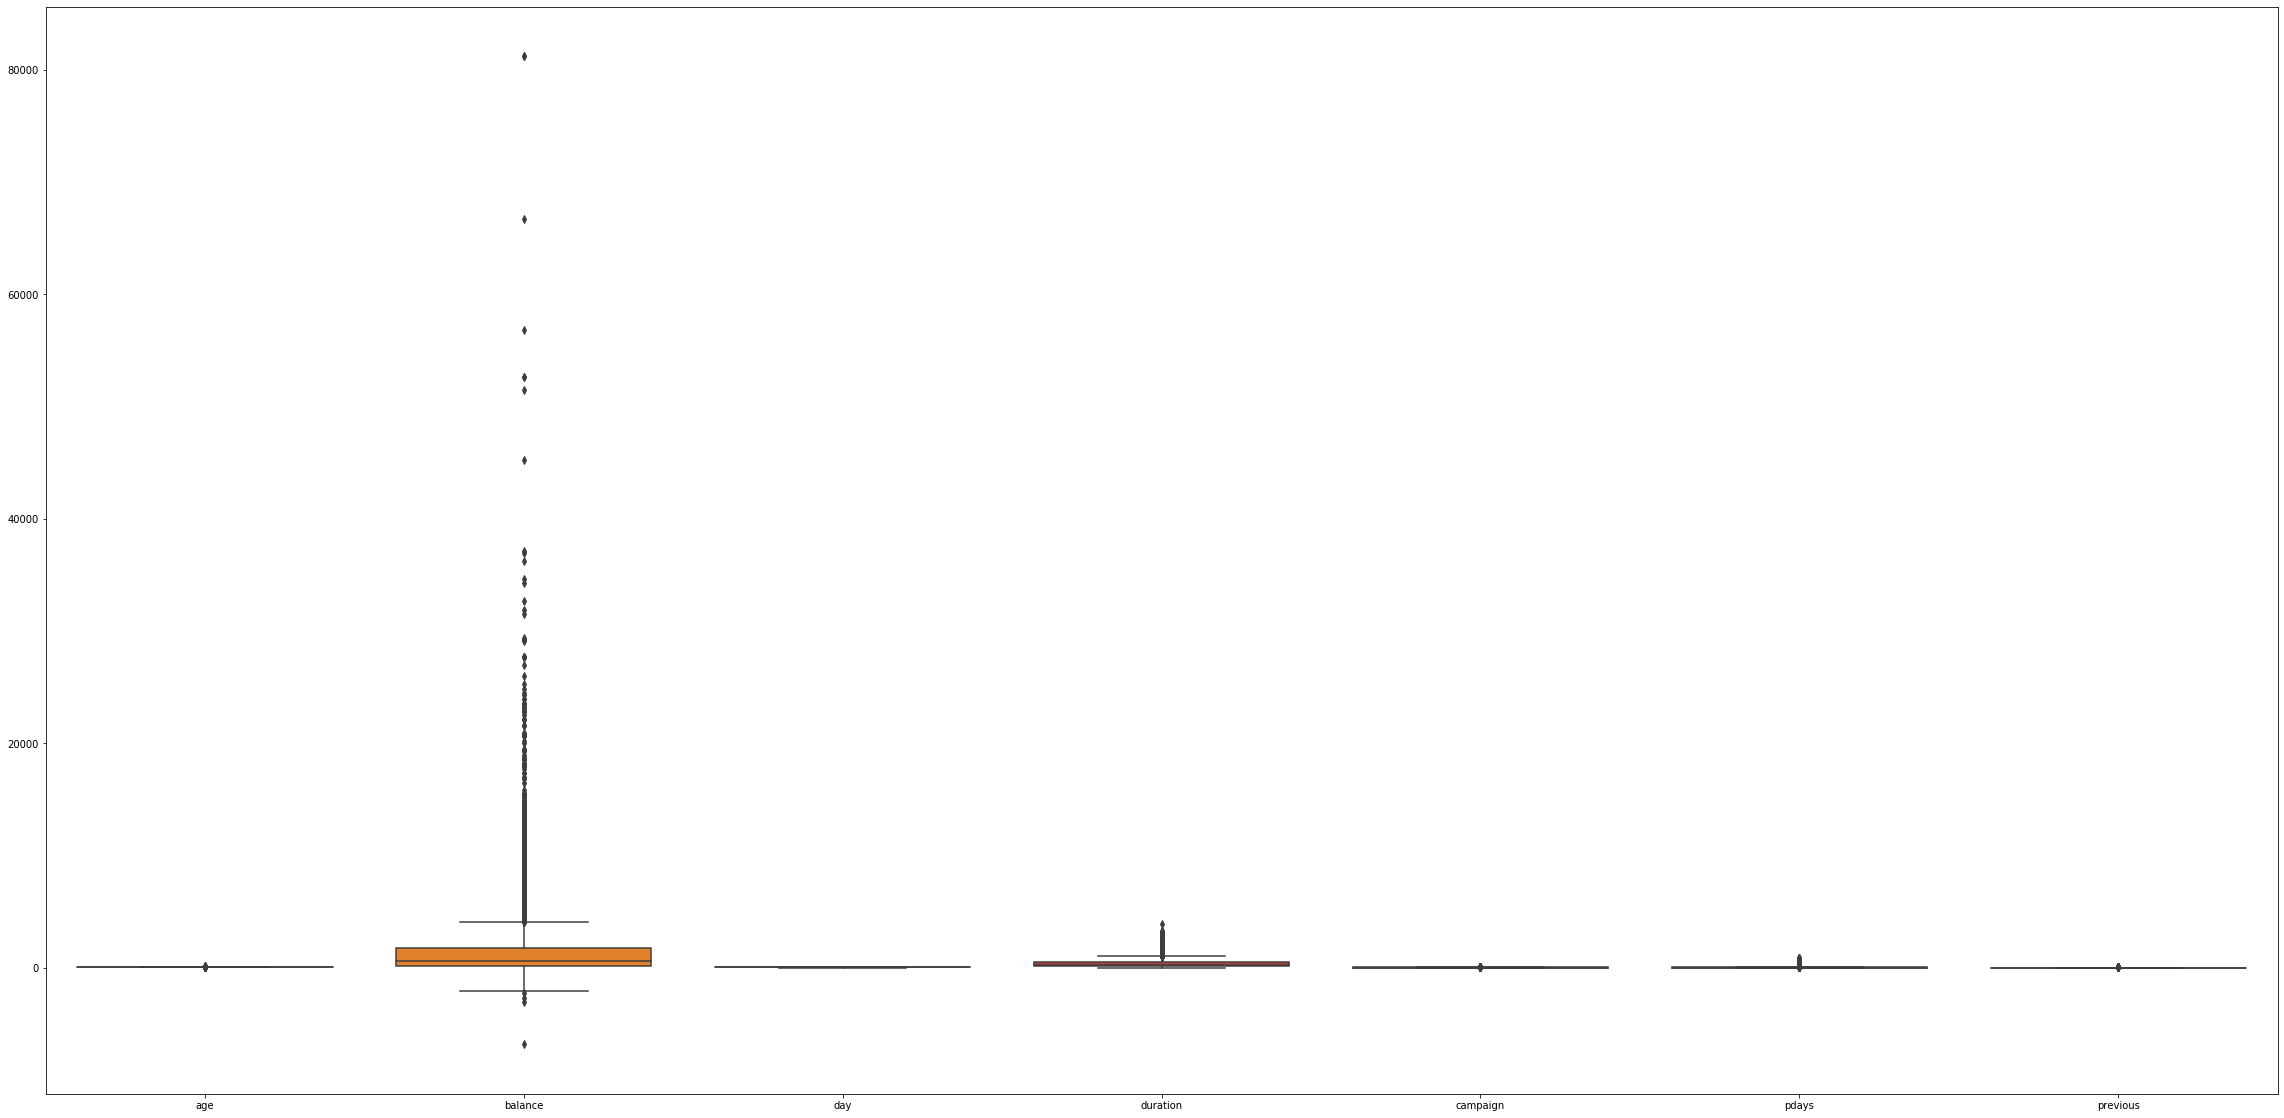

In [8]:
plt.figure(figsize=(40,20))
sns.boxplot(data=data.drop('deposit', axis=1))

In [9]:
cek = ['balance', 'duration']

def cek_outlier(data, col_name):
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    print(f"Lower limit {col_name} : {low}, & upper limit : {high}")

for i in cek:
    cek_outlier(data, i)

Lower limit balance : -2257.0, & upper limit : 4087.0
Lower limit duration : -399.0, & upper limit : 1033.0


<hr>

### __Categorical & Numerical Column Exploration__

It is very important to look at the response column, which holds the information, which we are going to predict. In our case we should look at 'deposit' column and compare its values to other columns.
First of all we should look at the number of 'yes' and 'no' values in the response column 'deposit'.

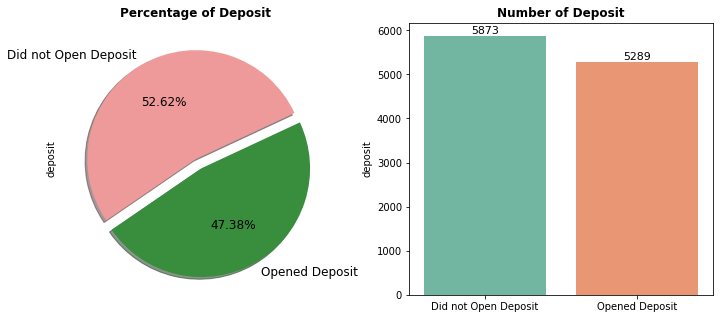

In [10]:
deposit = data.loc[:,"deposit"].value_counts()
index = ["Did not Open Deposit", "Opened Deposit"]


plt.figure(figsize=[12,5])
plt.subplot(121)
colors = ["#FA5858", "#64FE2E"]
plt.title("Percentage of Deposit",size= 12, fontweight="bold")
data["deposit"].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', shadow=True, colors=['#EF9A9A', "#388E3C"], 
                                             labels=index, fontsize=12, startangle=25)

plt.subplot(122)
l= sns.barplot(index, deposit, data=data, palette = "Set2")
plt.title("Number of Deposit",size= 12, fontweight="bold")
for p in l.patches:
    l.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
    ha="center", va="center", fontsize=11, color="black", rotation=0, xytext=(0, 5),textcoords="offset points")


#### __Categorical Columns__

In [11]:
Yes = data[data['deposit'] == 'yes']
No = data[data['deposit'] == 'no']


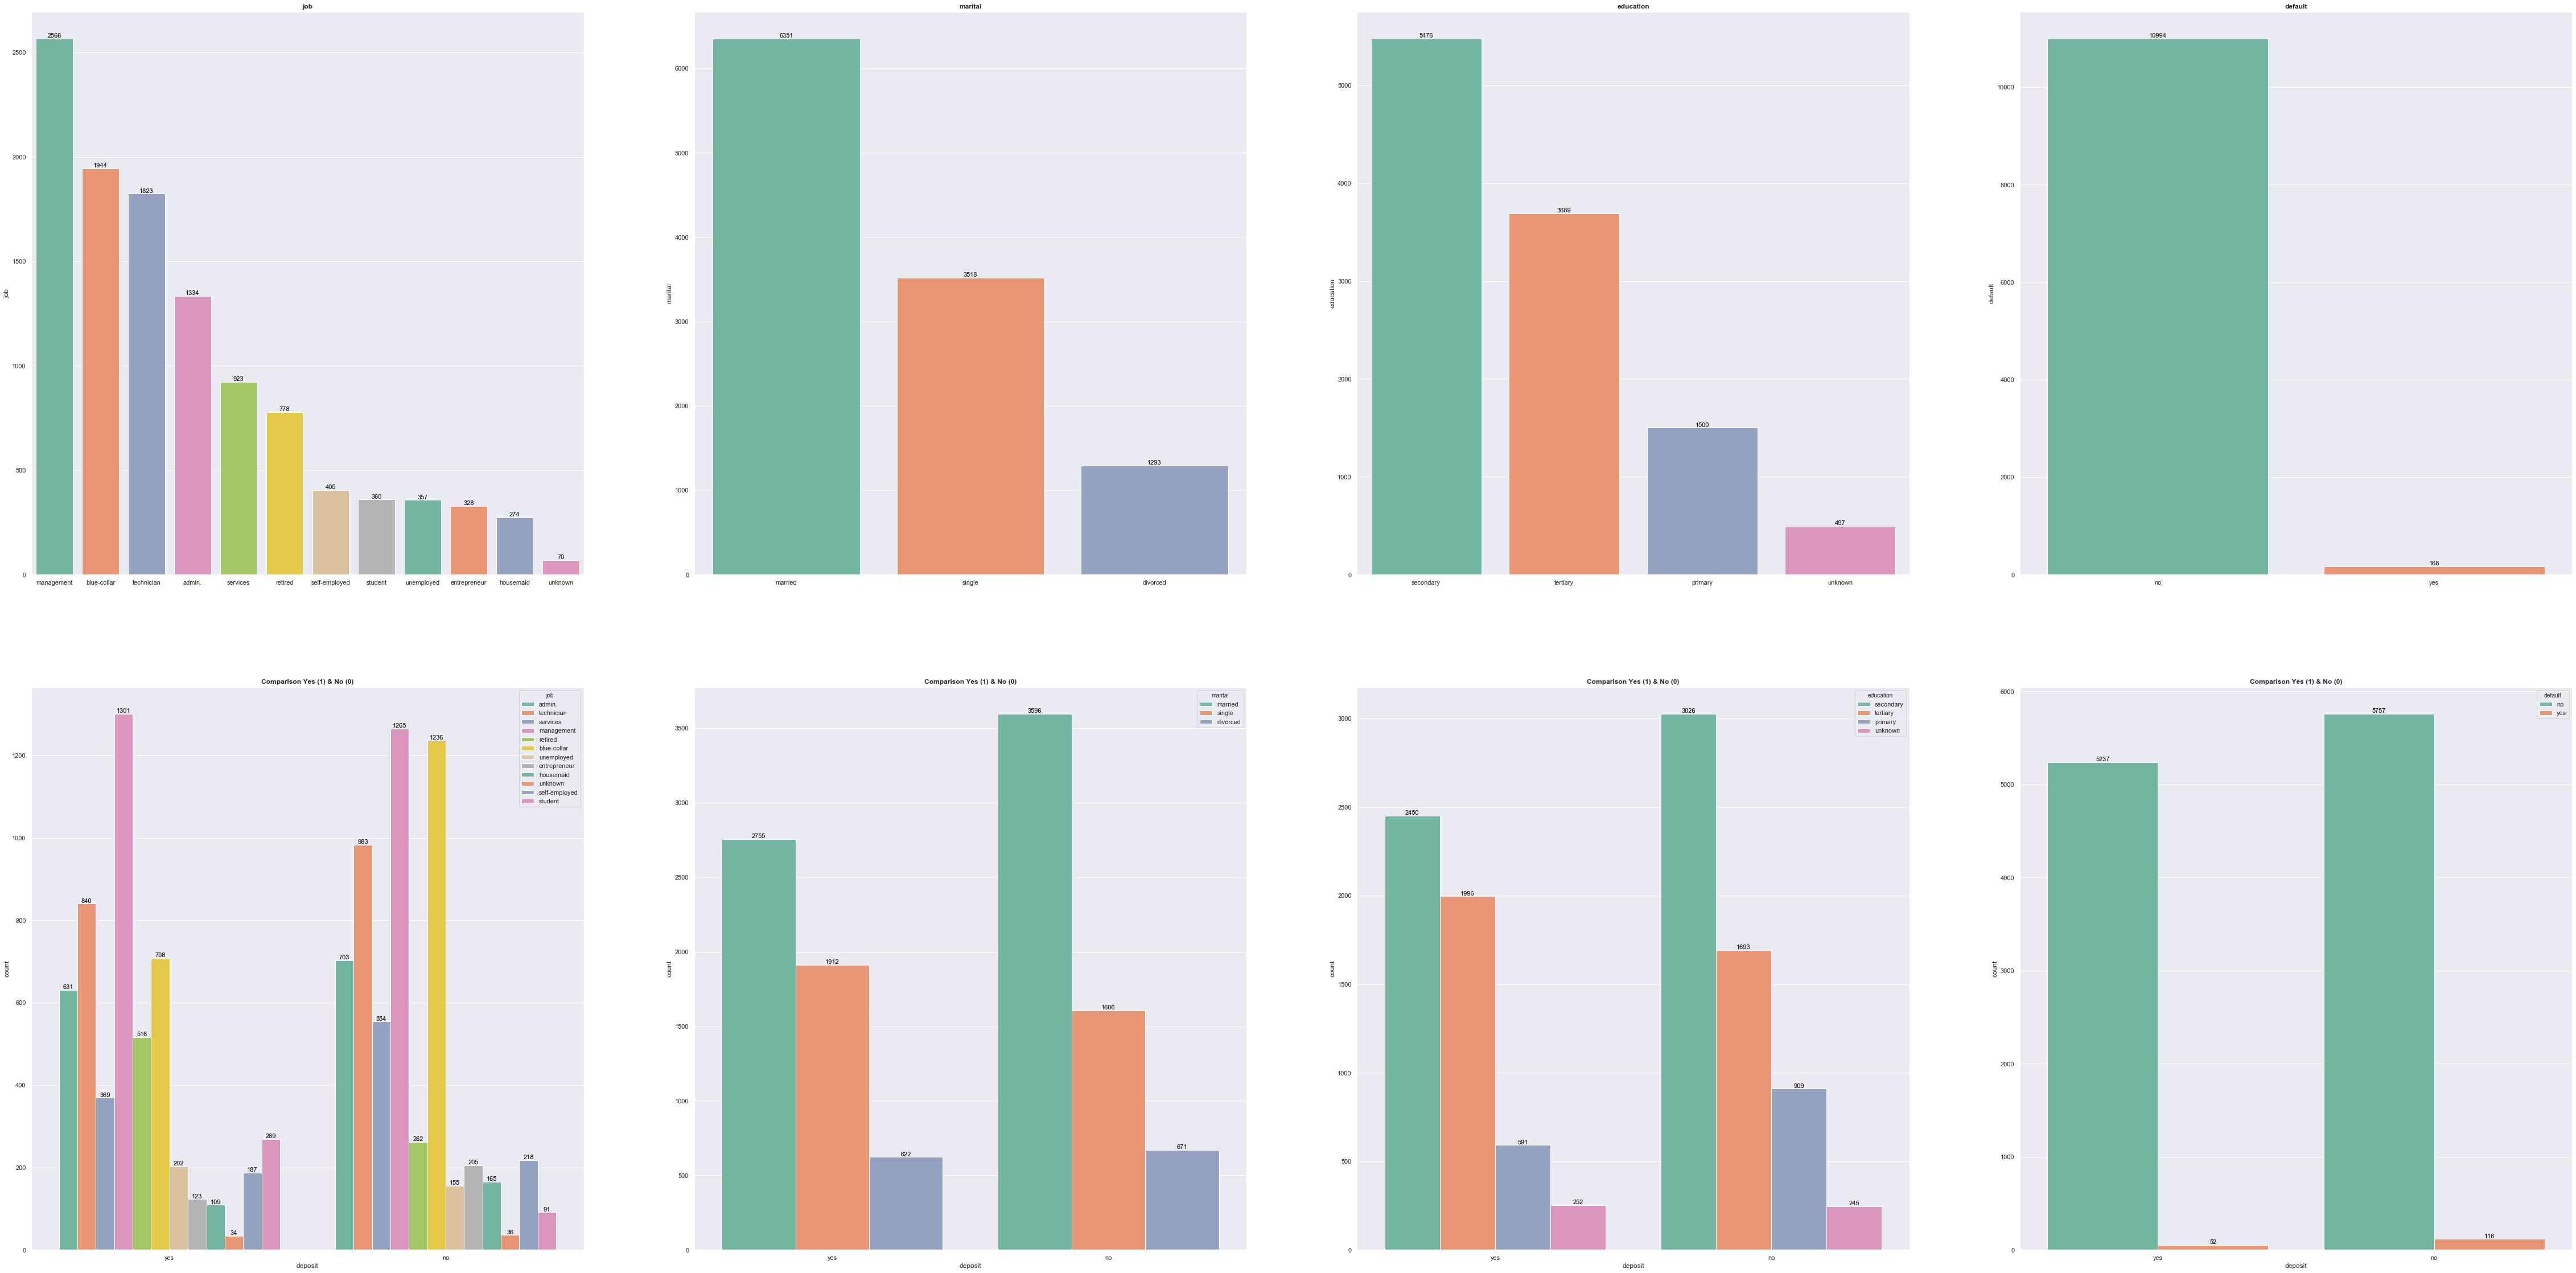

In [12]:
column = ['job','marital', 'education','default']

sns.set(style = "darkgrid")
fig = plt.figure(figsize = (80,40))

for i in range(len(column)):    
    val = data.loc[:,column[i]].value_counts()
    ind = data[column[i]].value_counts().index
    
    ax1 = fig.add_subplot(2, 4, i+1)
    ax1.set_title(column[i], fontweight="bold")

    ax2 = fig.add_subplot(2, 4, 5+i)
    ax2.set_title("Comparison Yes (1) & No (0)", fontweight="bold")

    mark1 = sns.barplot(x = ind, y = val, ax= ax1, palette = "Set2")
    for p in mark1.patches:
                 mark1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha="center", va="center", fontsize=11, color="black", rotation=0, xytext=(0, 5),
                     textcoords="offset points")
    mark2 = sns.countplot(x = "deposit", hue = column[i], data = data, ax = ax2, palette = "Set2")
    for p in mark2.patches:
                 mark2.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha="center", va="center", fontsize=11, color="black", rotation=0, xytext=(0, 5),
                     textcoords="offset points")

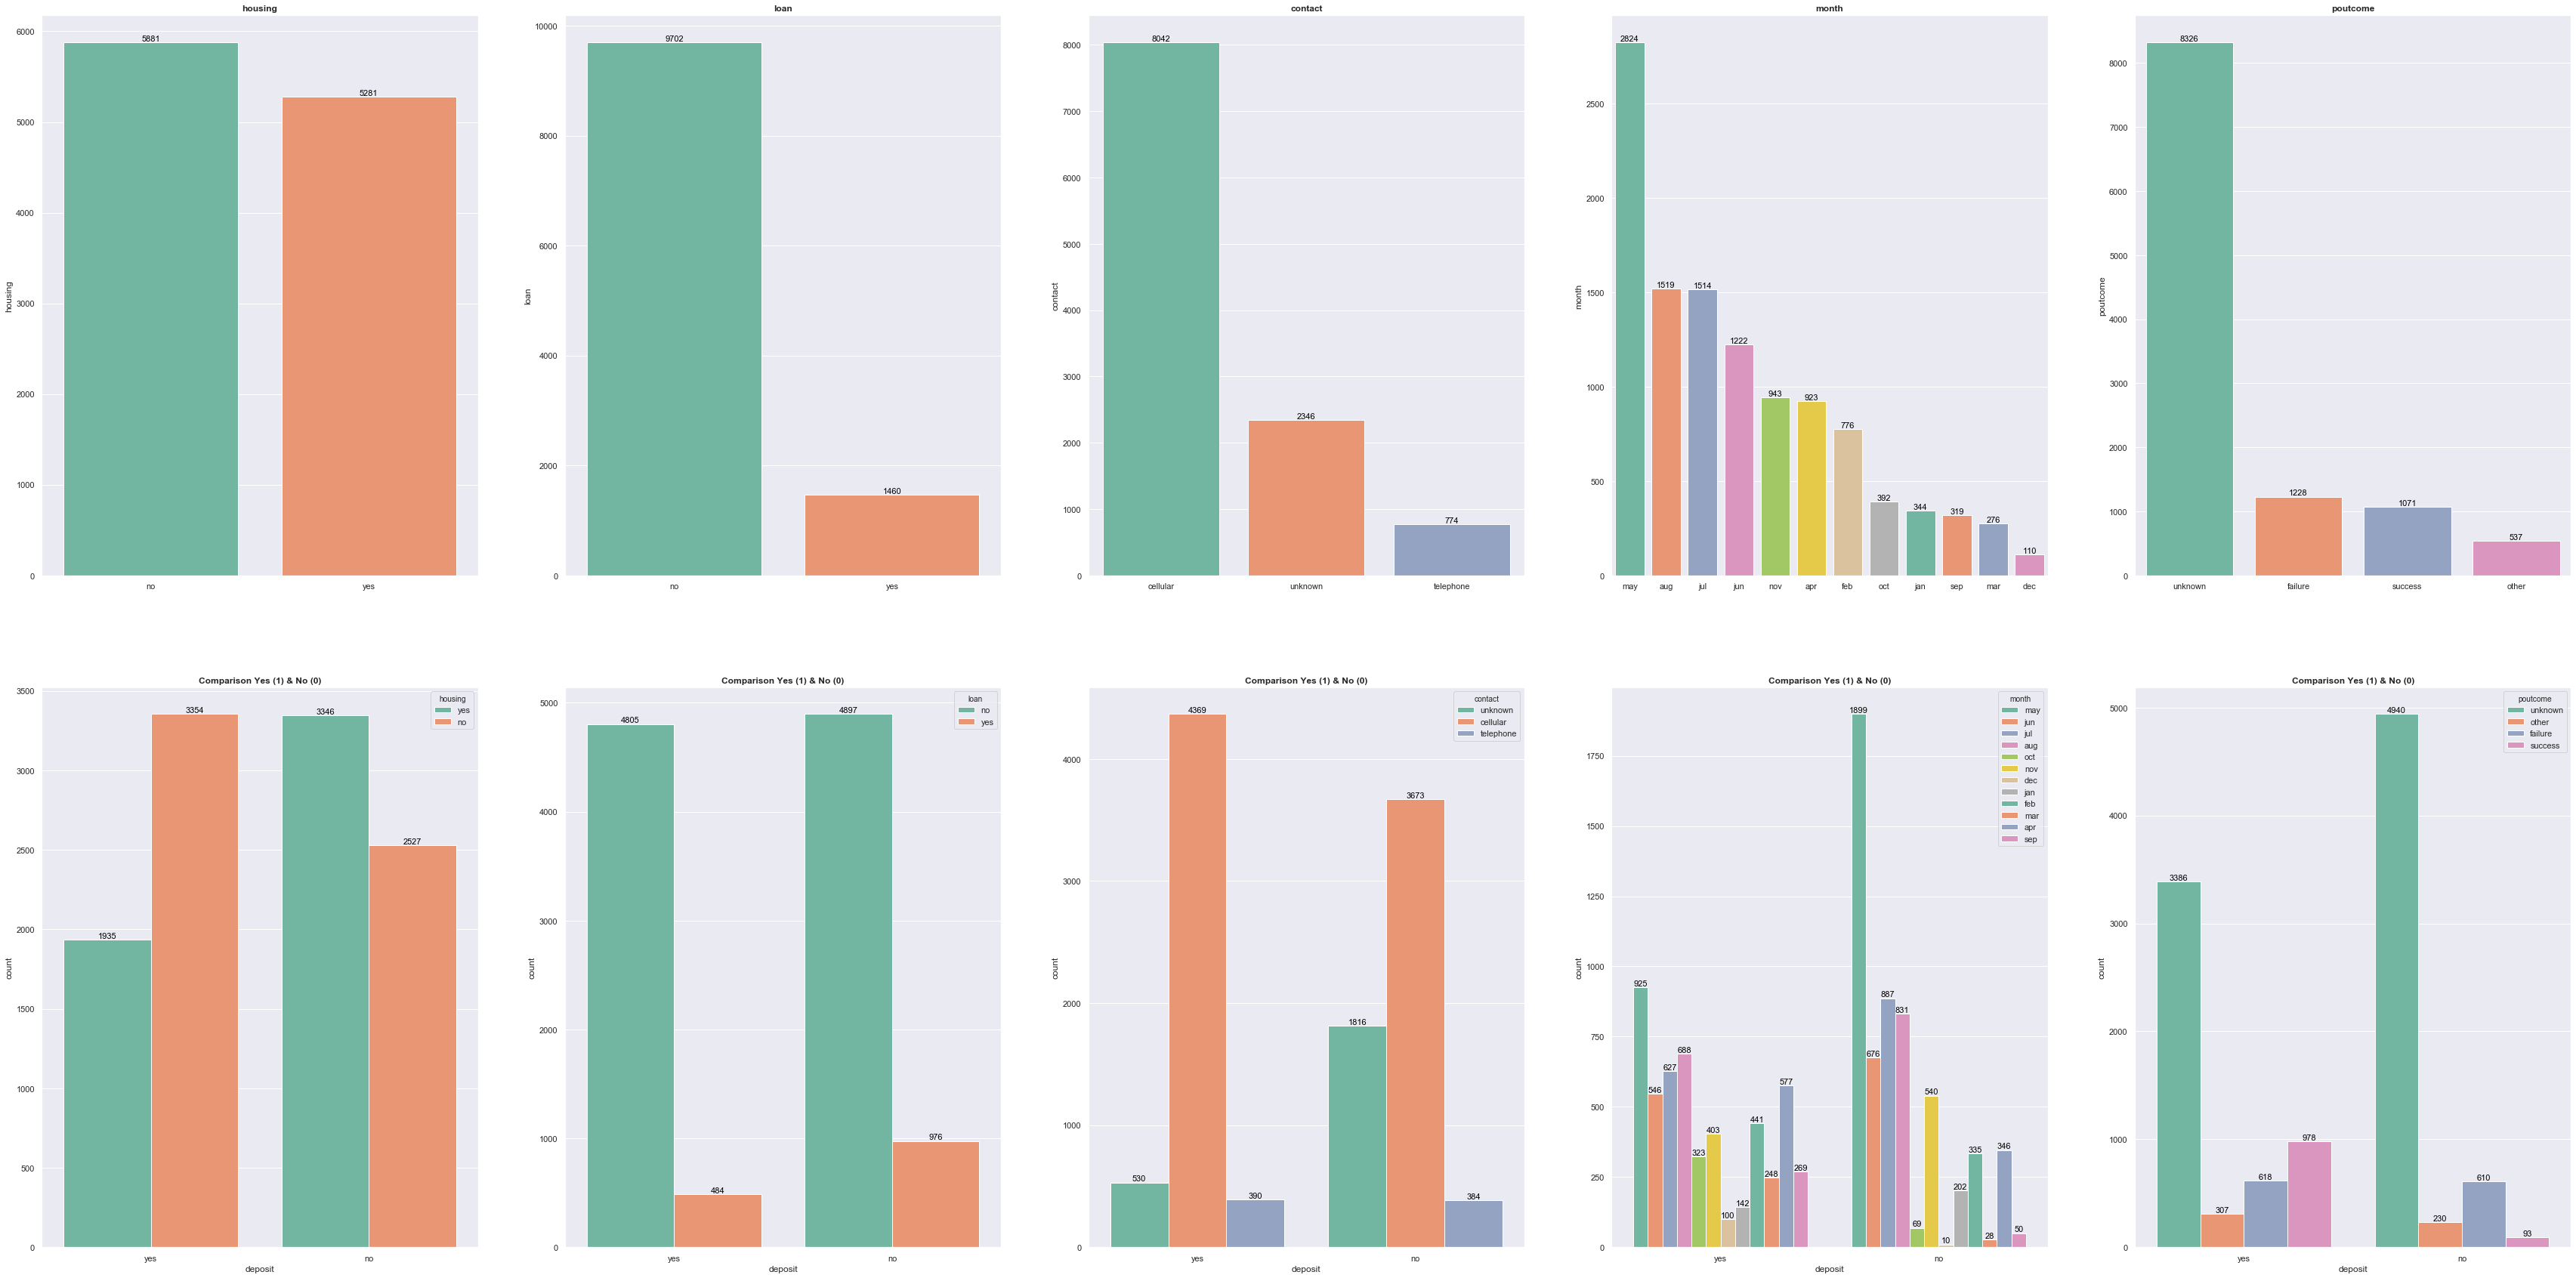

In [13]:
column = ['housing', 'loan', 'contact','month','poutcome']

sns.set(style = "darkgrid")
fig = plt.figure(figsize = (60,30))

for i in range(len(column)):    
    val = data.loc[:,column[i]].value_counts()
    ind = data[column[i]].value_counts().index
    
    ax1 = fig.add_subplot(2, 5, i+1)
    ax1.set_title(column[i], fontweight="bold")

    ax2 = fig.add_subplot(2, 5, 6+i)
    ax2.set_title("Comparison Yes (1) & No (0)", fontweight="bold")

    mark1 = sns.barplot(x = ind, y = val, ax= ax1 ,palette = "Set2")
    for p in mark1.patches:
                 mark1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha="center", va="center", fontsize=11, color="black", rotation=0, xytext=(0, 5),
                     textcoords="offset points")
    mark2 = sns.countplot(x = "deposit", hue = column[i], data = data, ax = ax2, palette = "Set2")
    for p in mark2.patches:
                 mark2.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha="center", va="center", fontsize=11, color="black", rotation=0, xytext=(0, 5),
                     textcoords="offset points")

#### __Numerical Columns__

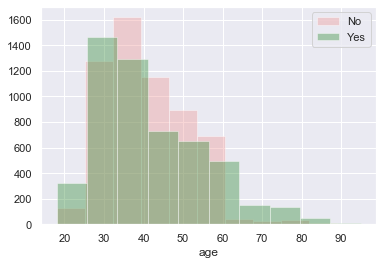

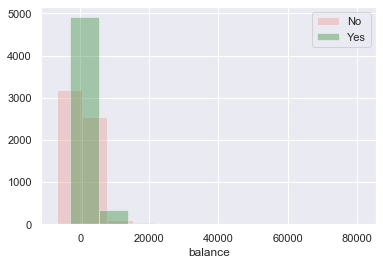

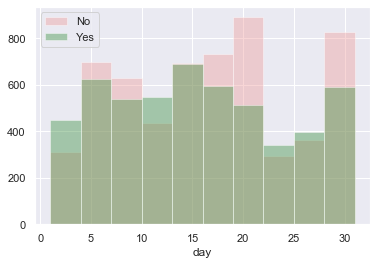

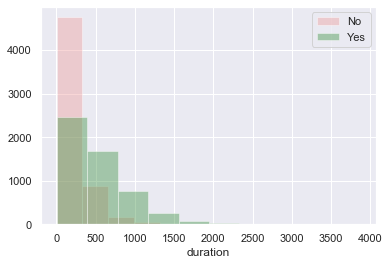

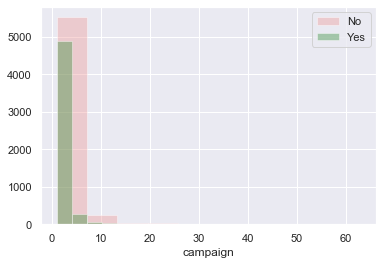

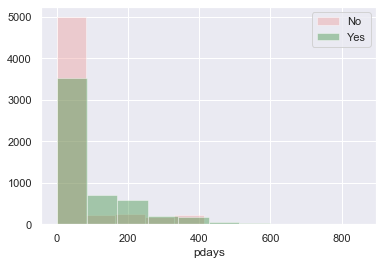

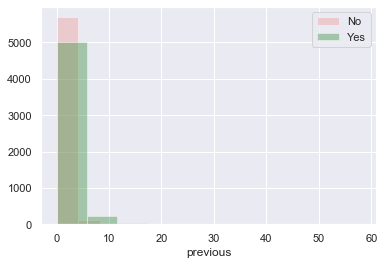

In [14]:
for i in data.select_dtypes(exclude='O'):
    sns.distplot(data[data['deposit']=='no'][i],label='No',kde=False,bins=10,color='#EF9A9A')
    sns.distplot(data[data['deposit']=='yes'][i],label='Yes',kde=False,bins=10,color="#388E3C")
    plt.legend()
    plt.show()

#### __Number and Percentage of Deposit by Faeature__ 

In [15]:
feature = "job"

valY = Yes.loc[:,feature].value_counts()
valN = No.loc[:, feature].value_counts()

score = pd.DataFrame()
score["Open"] = valY
score["Not Open"] = valN
score["%Open"] = round((valY * 100 / (valY + valN)), 2)
score["%Not Open"] = round((valN * 100 / (valY + valN)), 2)
score

Open  Not Open  %Open  %Not Open
management     1301      1265  50.70      49.30
technician      840       983  46.08      53.92
blue-collar     708      1236  36.42      63.58
admin.          631       703  47.30      52.70
retired         516       262  66.32      33.68
services        369       554  39.98      60.02
student         269        91  74.72      25.28
unemployed      202       155  56.58      43.42
self-employed   187       218  46.17      53.83
entrepreneur    123       205  37.50      62.50
housemaid       109       165  39.78      60.22
unknown          34        36  48.57      51.43

In [16]:
feature = "marital"

valY = Yes.loc[:,feature].value_counts()
valN = No.loc[:, feature].value_counts()

score = pd.DataFrame()
score["Open"] = valY
score["Not Open"] = valN
score["%Open"] = round((valY * 100 / (valY + valN)), 2)
score["%Not Open"] = round((valN * 100 / (valY + valN)), 2)
score

Open  Not Open  %Open  %Not Open
married   2755      3596  43.38      56.62
single    1912      1606  54.35      45.65
divorced   622       671  48.11      51.89

In [17]:
feature = "education"

valY = Yes.loc[:,feature].value_counts()
valN = No.loc[:, feature].value_counts()

score = pd.DataFrame()
score["Open"] = valY
score["Not Open"] = valN
score["%Open"] = round((valY * 100 / (valY + valN)), 2)
score["%Not Open"] = round((valN * 100 / (valY + valN)), 2)
score

Open  Not Open  %Open  %Not Open
secondary  2450      3026  44.74      55.26
tertiary   1996      1693  54.11      45.89
primary     591       909  39.40      60.60
unknown     252       245  50.70      49.30

In [18]:
feature = "contact"

valY = Yes.loc[:,feature].value_counts()
valN = No.loc[:, feature].value_counts()

score = pd.DataFrame()
score["Open"] = valY
score["Not Open"] = valN
score["%Open"] = round((valY * 100 / (valY + valN)), 2)
score["%Not Open"] = round((valN * 100 / (valY + valN)), 2)
score

Open  Not Open  %Open  %Not Open
cellular   4369      3673  54.33      45.67
unknown     530      1816  22.59      77.41
telephone   390       384  50.39      49.61

In [19]:
feature = "default"

valY = Yes.loc[:,feature].value_counts()
valN = No.loc[:, feature].value_counts()

score = pd.DataFrame()
score["Open"] = valY
score["Not Open"] = valN
score["%Open"] = round((valY * 100 / (valY + valN)), 2)
score["%Not Open"] = round((valN * 100 / (valY + valN)), 2)
score

Open  Not Open  %Open  %Not Open
no   5237      5757  47.64      52.36
yes    52       116  30.95      69.05

In [20]:
feature = "housing"

valY = Yes.loc[:,feature].value_counts()
valN = No.loc[:, feature].value_counts()

score = pd.DataFrame()
score["Open"] = valY
score["Not Open"] = valN
score["%Open"] = round((valY * 100 / (valY + valN)), 2)
score["%Not Open"] = round((valN * 100 / (valY + valN)), 2)
score

Open  Not Open  %Open  %Not Open
no   3354      2527  57.03      42.97
yes  1935      3346  36.64      63.36

In [21]:
feature = "loan"

valY = Yes.loc[:,feature].value_counts()
valN = No.loc[:, feature].value_counts()

score = pd.DataFrame()
score["Open"] = valY
score["Not Open"] = valN
score["%Open"] = round((valY * 100 / (valY + valN)), 2)
score["%Not Open"] = round((valN * 100 / (valY + valN)), 2)
score

Open  Not Open  %Open  %Not Open
no   4805      4897  49.53      50.47
yes   484       976  33.15      66.85

In [22]:
feature = "poutcome"

valY = Yes.loc[:,feature].value_counts()
valN = No.loc[:, feature].value_counts()

score = pd.DataFrame()
score["Open"] = valY
score["Not Open"] = valN
score["%Open"] = round((valY * 100 / (valY + valN)), 2)
score["%Not Open"] = round((valN * 100 / (valY + valN)), 2)
score

Open  Not Open  %Open  %Not Open
unknown  3386      4940  40.67      59.33
success   978        93  91.32       8.68
failure   618       610  50.33      49.67
other     307       230  57.17      42.83

In [23]:
feature = "month"

valY = Yes.loc[:,feature].value_counts()
valN = No.loc[:, feature].value_counts()

score = pd.DataFrame()
score["Open"] = valY
score["Not Open"] = valN
score["%Open"] = round((valY * 100 / (valY + valN)), 2)
score["%Not Open"] = round((valN * 100 / (valY + valN)), 2)
score

Open  Not Open  %Open  %Not Open
may   925      1899  32.75      67.25
aug   688       831  45.29      54.71
jul   627       887  41.41      58.59
apr   577       346  62.51      37.49
jun   546       676  44.68      55.32
feb   441       335  56.83      43.17
nov   403       540  42.74      57.26
oct   323        69  82.40      17.60
sep   269        50  84.33      15.67
mar   248        28  89.86      10.14
jan   142       202  41.28      58.72
dec   100        10  90.91       9.09

In [24]:
mx = data["age"].max()
mn = data["age"].min()
ranges = np.arange(mn, mx + round((mx-mn)/5), round((mx-mn)/5))

crs = pd.DataFrame()
crs["Open"] = round(Yes["deposit"].groupby(pd.cut(Yes["age"], ranges)).count())
crs["Not Open"] = round(No["deposit"].groupby(pd.cut(No["age"], ranges)).count())
crs["%Open"] = round((crs["Open"] * 100/(crs["Open"] + crs["Not Open"])), 2)
crs["%Not Open"] = round((crs["Not Open"] * 100/(crs["Open"]+ crs["Not Open"])), 2)
crs.T

age        (18, 33]  (33, 48]  (48, 63]  (63, 78]  (78, 93]  (93, 108]
Open        1775.00    2021.0   1110.00    311.00     64.00        1.0
Not Open    1661.00    2791.0   1334.00     69.00     17.00        0.0
%Open         51.66      42.0     45.42     81.84     79.01      100.0
%Not Open     48.34      58.0     54.58     18.16     20.99        0.0

In [25]:
mx = data["balance"].max()
mn = data["balance"].min()
ranges = np.arange(mn, mx + round((mx-mn)/5), round((mx-mn)/5))

crs = pd.DataFrame()
crs["Open"] = round(Yes["deposit"].groupby(pd.cut(Yes["balance"], ranges)).count())
crs["Not Open"] = round(No["deposit"].groupby(pd.cut(No["balance"], ranges)).count())
crs["%Open"] = round((crs["Open"] * 100/(crs["Open"] + crs["Not Open"])), 2)
crs["%Not Open"] = round((crs["Not Open"] * 100/(crs["Open"]+ crs["Not Open"])), 2)
crs.T

balance    (-6847, 10763]  (10763, 28373]  (28373, 45983]  (45983, 63593]  \
Open              5178.00           100.0            7.00             2.0   
Not Open          5790.00            73.0            6.00             2.0   
%Open               47.21            57.8           53.85            50.0   
%Not Open           52.79            42.2           46.15            50.0   

balance    (63593, 81203]  (81203, 98813]  
Open                  0.0             2.0  
Not Open              1.0             0.0  
%Open                 0.0           100.0  
%Not Open           100.0             0.0

In [26]:
mx = data["day"].max()
mn = data["day"].min()
ranges = np.arange(mn, mx + round((mx-mn)/5), round((mx-mn)/5))

crs = pd.DataFrame()
crs["Open"] = round(Yes["deposit"].groupby(pd.cut(Yes["day"], ranges)).count())
crs["Not Open"] = round(No["deposit"].groupby(pd.cut(No["day"], ranges)).count())
crs["%Open"] = round((crs["Open"] * 100/(crs["Open"] + crs["Not Open"])), 2)
crs["%Not Open"] = round((crs["Not Open"] * 100/(crs["Open"]+ crs["Not Open"])), 2)
crs.T

day         (1, 7]  (7, 13]  (13, 19]  (19, 25]  (25, 31]
Open       1143.00  1167.00   1166.00    868.00     855.0
Not Open   1205.00  1050.00   1475.00   1014.00    1097.0
%Open        48.68    52.64     44.15     46.12      43.8
%Not Open    51.32    47.36     55.85     53.88      56.2

In [27]:
mx = data["pdays"].max()
mn = data["pdays"].min()
ranges = np.arange(mn, mx + round((mx-mn)/5), round((mx-mn)/5))

crs = pd.DataFrame()
crs["Open"] = round(Yes["deposit"].groupby(pd.cut(Yes["pdays"], ranges)).count())
crs["Not Open"] = round(No["deposit"].groupby(pd.cut(No["pdays"], ranges)).count())
crs["%Open"] = round((crs["Open"] * 100/(crs["Open"] + crs["Not Open"])), 2)
crs["%Not Open"] = round((crs["Not Open"] * 100/(crs["Open"]+ crs["Not Open"])), 2)
crs.T

pdays      (-1, 170]  (170, 341]  (341, 512]  (512, 683]  (683, 854]
Open          849.00       787.0      228.00        27.0       14.00
Not Open      296.00       435.0      191.00         4.0        7.00
%Open          74.15        64.4       54.42        87.1       66.67
%Not Open      25.85        35.6       45.58        12.9       33.33

In [28]:
mx = data["duration"].max()
mn = data["duration"].min()
ranges = np.arange(mn, mx + round((mx-mn)/5), round((mx-mn)/5))

crs = pd.DataFrame()
crs["Open"] = round(Yes["deposit"].groupby(pd.cut(Yes["duration"], ranges)).count())
crs["Not Open"] = round(No["deposit"].groupby(pd.cut(No["duration"], ranges)).count())
crs["%Open"] = round((crs["Open"] * 100/(crs["Open"] + crs["Not Open"])), 2)
crs["%Not Open"] = round((crs["Not Open"] * 100/(crs["Open"]+ crs["Not Open"])), 2)
crs.T

duration   (2, 778]  (778, 1554]  (1554, 2330]  (2330, 3106]  (3106, 3882]
Open        4133.00       1039.0        100.00          14.0           3.0
Not Open    5721.00        143.0          7.00           0.0           1.0
%Open         41.94         87.9         93.46         100.0          75.0
%Not Open     58.06         12.1          6.54           0.0          25.0

In [29]:
mx = data["campaign"].max()
mn = data["campaign"].min()
ranges = np.arange(mn, mx + round((mx-mn)/4), round((mx-mn)/4))

crs = pd.DataFrame()
crs["Open"] = round(Yes["deposit"].groupby(pd.cut(Yes["campaign"], ranges)).count())
crs["Not Open"] = round(No["deposit"].groupby(pd.cut(No["campaign"], ranges)).count())
crs["%Open"] = round((crs["Open"] * 100/(crs["Open"] + crs["Not Open"])), 2)
crs["%Not Open"] = round((crs["Not Open"] * 100/(crs["Open"]+ crs["Not Open"])), 2)
crs.T

campaign   (1, 17]  (17, 33]  (33, 49]  (49, 65]
Open       2723.00      5.00       0.0       0.0
Not Open   3581.00     51.00       3.0       1.0
%Open        43.19      8.93       0.0       0.0
%Not Open    56.81     91.07     100.0     100.0

In [30]:
mx = data["previous"].max()
mn = data["previous"].min()
ranges = np.arange(mn, mx + round((mx-mn)/5), round((mx-mn)/5))

crs = pd.DataFrame()
crs["Open"] = round(Yes["deposit"].groupby(pd.cut(Yes["previous"], ranges)).count())
crs["Not Open"] = round(No["deposit"].groupby(pd.cut(No["previous"], ranges)).count())
crs["%Open"] = round((crs["Open"] * 100/(crs["Open"] + crs["Not Open"])), 2)
crs["%Not Open"] = round((crs["Not Open"] * 100/(crs["Open"]+ crs["Not Open"])), 2)
crs.T

previous   (0, 12]  (12, 24]  (24, 36]  (36, 48]  (48, 60]
Open       1876.00     24.00       3.0       0.0       2.0
Not Open    905.00     22.00       3.0       3.0       0.0
%Open        67.46     52.17      50.0       0.0     100.0
%Not Open    32.54     47.83      50.0     100.0       0.0

Regarding the diagrams and table we can tell that according to our dataset:
- Customers with 'student' and 'retired' jobs have the highest probably to open term deposit.
- Single customers have the highest probably to open term deposit.
- Customers with 'tertiary education' have the highest probably to open term deposit.
- Customers has credit in default, housing loan and personal loan are less likely to open term deposit.
- Customers with 'unknown' type of contact are less likely to open term deposit.
- December and March are the months when have the highest probably customers to open term deposit.
- Customers with 'success' outcome of the previous marketing campaign are less likely to open term deposit
- Customers who are over 60 years old and under 30 years old have the highest probably to open term deposit.
- Customers who have balance over 10.000 have the highest probably to open term deposit.
- Customers with less campaign and duration over 400 seconds are the highest probably to open term deposit.
 

<Figure size 1440x1440 with 0 Axes>

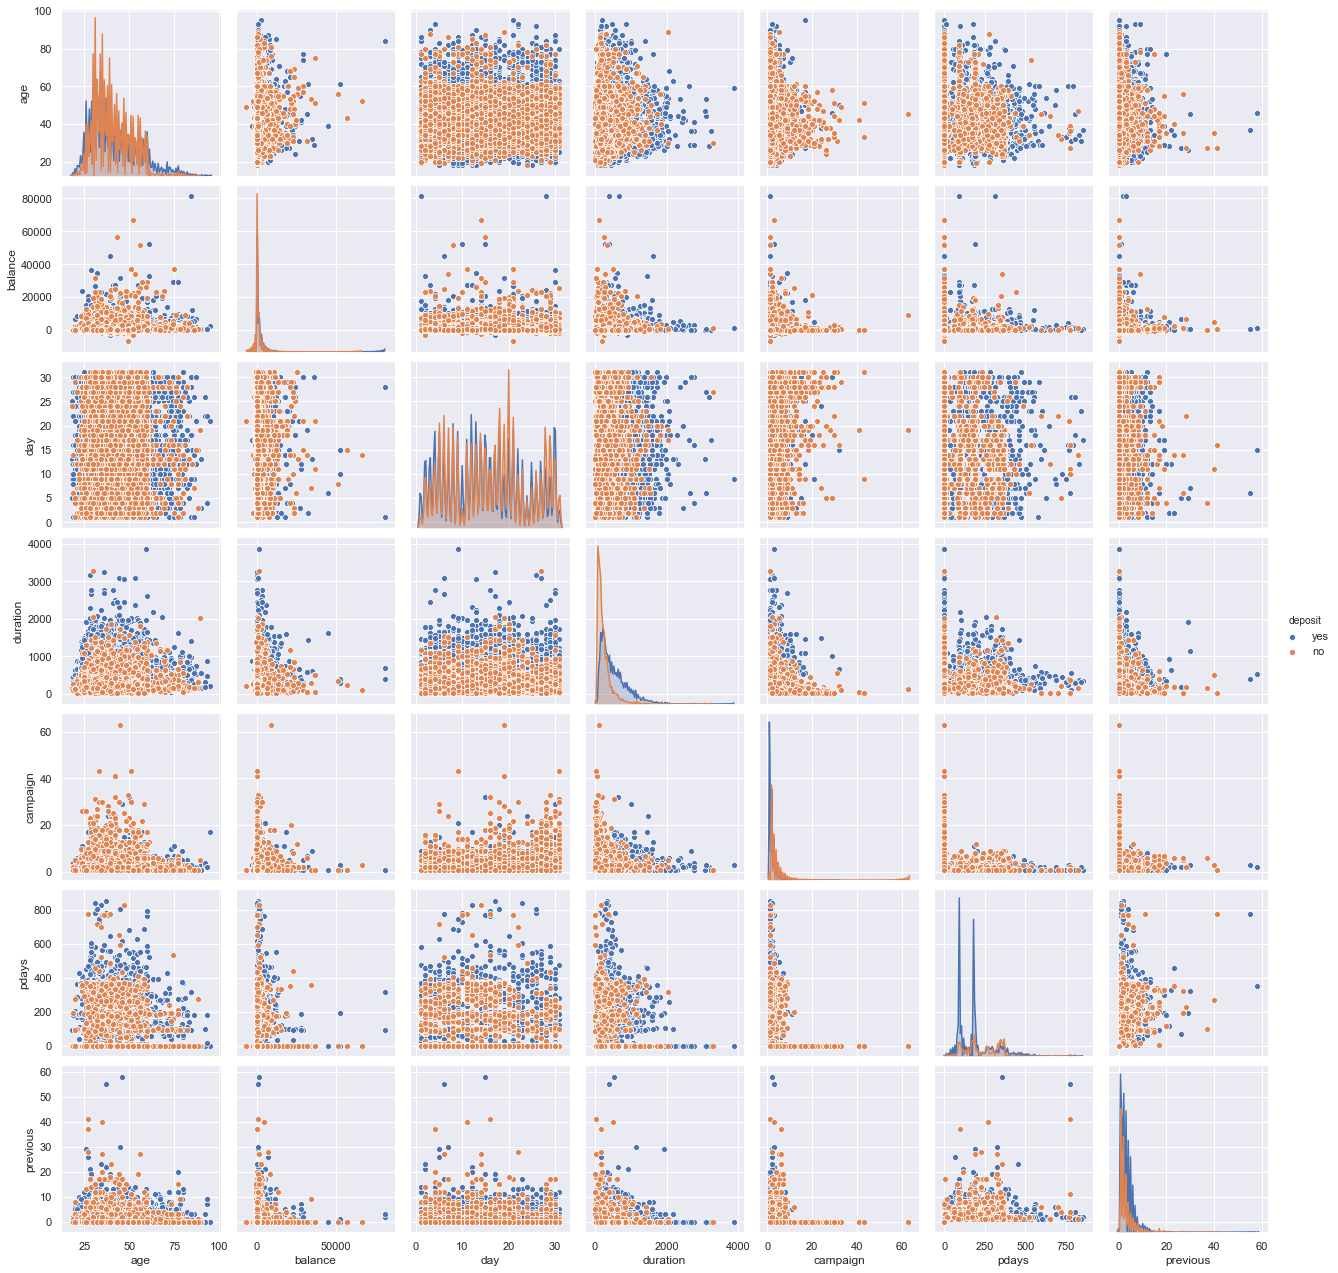

In [31]:
plt.figure(figsize=(20,20))

sns.pairplot(data, hue='deposit',diag_kws={'bw': 0.2})

<hr>

### __Statistical Test__

#### __Normality Test__

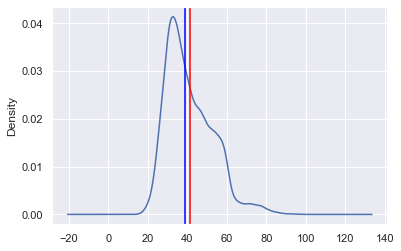

In [32]:
age= data['age']
age.plot.density()
plt.axvline(age.mean(), color='red')
plt.axvline(age.median(), color='blue')
plt.show()

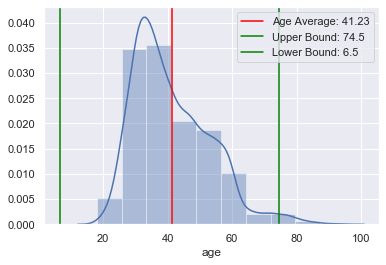

In [33]:
iqr = data['age'].quantile(0.75) - data['age'].quantile(0.25) 
upper_bound = data['age'].quantile(0.75) + 1.5*iqr
lower_bound = data['age'].quantile(0.25) - 1.5*iqr

sns.distplot(data['age'], bins=10)
plt.axvline(data['age'].mean(), label=f'Age Average: {round(data["age"].mean(),2)}', color='red')
plt.axvline(upper_bound, label=f'Upper Bound: {upper_bound}', color='green')
plt.axvline(lower_bound, label=f'Lower Bound: {lower_bound}', color='green')

plt.legend()
plt.show()

In [34]:
stats.skewtest(age)

SkewtestResult(statistic=32.45612325294317, pvalue=4.4395838112276396e-231)

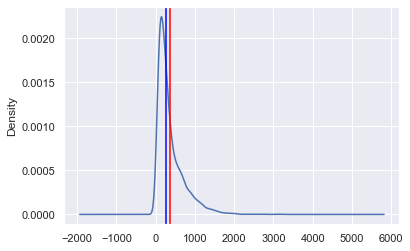

In [35]:
duration= data['duration']
duration.plot.density()
plt.axvline(duration.mean(), color='red')
plt.axvline(duration.median(), color='blue')
plt.show()

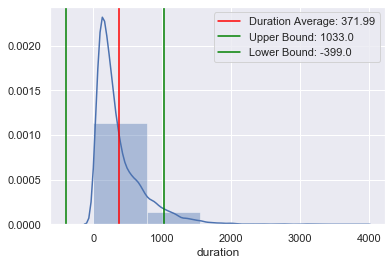

In [36]:
iqr = data['duration'].quantile(0.75) - data['duration'].quantile(0.25) 
upper_bound = data['duration'].quantile(0.75) + 1.5*iqr
lower_bound = data['duration'].quantile(0.25) - 1.5*iqr

sns.distplot(data['duration'], bins=5)
plt.axvline(data['duration'].mean(), label=f'Duration Average: {round(data["duration"].mean(),2)}', color='red')
plt.axvline(upper_bound, label=f'Upper Bound: {upper_bound}', color='green')
plt.axvline(lower_bound, label=f'Lower Bound: {lower_bound}', color='green')

plt.legend()
plt.show()

In [37]:
stats.skewtest(duration)

SkewtestResult(statistic=59.679243772700254, pvalue=0.0)

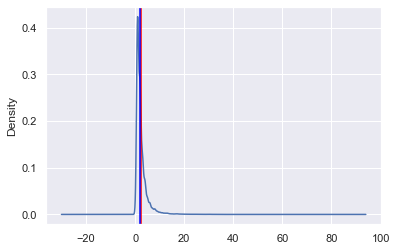

In [38]:
campaign=data['campaign']
campaign.plot.density()
plt.axvline(campaign.mean(), color='red')
plt.axvline(campaign.median(), color='blue')
plt.show()

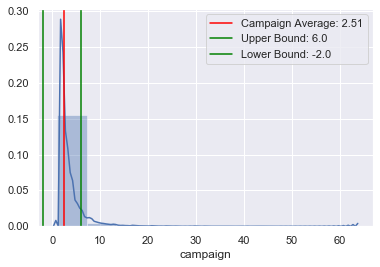

In [39]:
iqr = data['campaign'].quantile(0.75) - data['campaign'].quantile(0.25) 
upper_bound = data['campaign'].quantile(0.75) + 1.5*iqr
lower_bound = data['campaign'].quantile(0.25) - 1.5*iqr

sns.distplot(data['campaign'], bins=10)
plt.axvline(data['campaign'].mean(), label=f'Campaign Average: {round(data["campaign"].mean(),2)}', color='red')
plt.axvline(upper_bound, label=f'Upper Bound: {upper_bound}', color='green')
plt.axvline(lower_bound, label=f'Lower Bound: {lower_bound}', color='green')

plt.legend()
plt.show()

In [40]:
stats.skewtest(campaign)

SkewtestResult(statistic=92.18047722920761, pvalue=0.0)

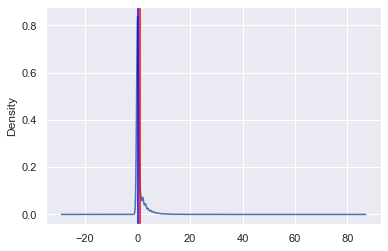

In [41]:
previous= data['previous']
previous.plot.density()
plt.axvline(previous.mean(), color='red')
plt.axvline(previous.median(), color='blue')
plt.show()

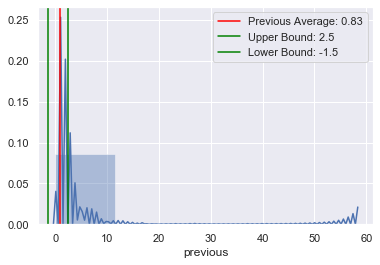

In [42]:
iqr = data['previous'].quantile(0.75) - data['previous'].quantile(0.25) 
upper_bound = data['previous'].quantile(0.75) + 1.5*iqr
lower_bound = data['previous'].quantile(0.25) - 1.5*iqr

sns.distplot(data['previous'], bins=5)
plt.axvline(data['previous'].mean(), label=f'Previous Average: {round(data["previous"].mean(),2)}', color='red')
plt.axvline(upper_bound, label=f'Upper Bound: {upper_bound}', color='green')
plt.axvline(lower_bound, label=f'Lower Bound: {lower_bound}', color='green')

plt.legend()
plt.show()

In [43]:
stats.skewtest(previous)

SkewtestResult(statistic=101.96599241162691, pvalue=0.0)

#### __Correlation Test__

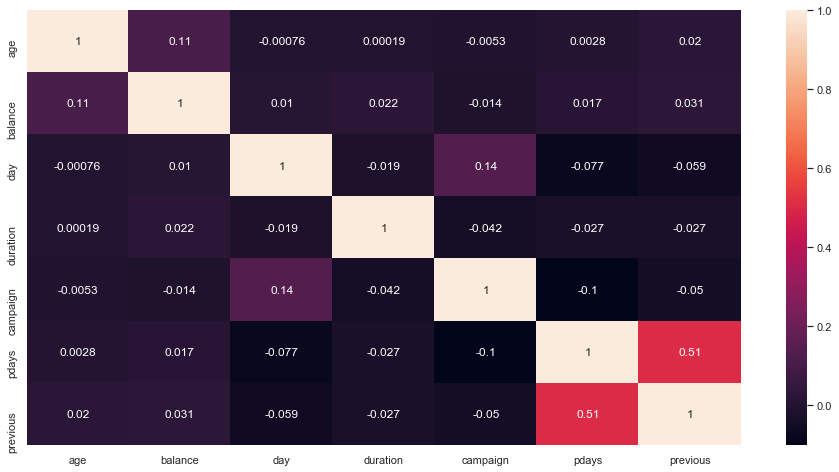

In [44]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

<hr>

### __Feature Selection & Engineering__

Before we will be able to apply machine learning techniques, we should prepare the dataset for processing:

- Convert columns with 'yes' and 'no' values to boolean columns;
- Convert categorical columns into dummy variables;
- Get the feature importances for the model.

In [45]:
def get_dummy_from_bool(row, column_name):
    return 1 if row[column_name] == 'yes' else 0

def clean_data(df):
    data_clean = data.copy()
    bool_columns = ['deposit','default', 'housing', 'loan', 'deposit']
    for bool_col in bool_columns:
        data_clean[bool_col] = data.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)        
    cat_columns = ['job', 'marital', 'education', 'contact', 'poutcome', 'month']
    for col in  cat_columns:
        data_clean = pd.concat([data_clean.drop(col, axis=1),
        pd.get_dummies(data_clean[col], prefix=col,
        drop_first=False, dummy_na=False)], axis=1)
    return data_clean

In [46]:
data_clean = clean_data(data)
data_clean.head(10)

age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   59        0     2343        1     0    5      1042         1     -1   
1   56        0       45        0     0    5      1467         1     -1   
2   41        0     1270        1     0    5      1389         1     -1   
3   55        0     2476        1     0    5       579         1     -1   
4   54        0      184        0     0    5       673         2     -1   
5   42        0        0        1     1    5       562         2     -1   
6   56        0      830        1     1    6      1201         1     -1   
7   60        0      545        1     0    6      1030         1     -1   
8   37        0        1        1     0    6       608         1     -1   
9   28        0     5090        1     0    6      1297         3     -1   

   previous  ...  month_dec  month_feb  month_jan  month_jul  month_jun  \
0         0  ...          0          0          0          0          0   
1         0  ...          0          0          0          0          0   
2         0  ...          0          0          0          0          0   
3         0  ...          0          0          0          0          0   
4         0  ...          0          0          0          0          0   
5         0  ...          0          0          0          0          0   
6         0  ...          0          0          0          0          0   
7         0  ...          0          0          0          0          0   
8         0  ...          0          0          0          0          0   
9         0  ...          0          0          0          0          0   

   month_mar  month_may  month_nov  month_oct  month_sep  
0          0          1          0          0          0  
1          0          1          0          0          0  
2          0          1          0          0          0  
3          0          1          0          0          0  
4          0          1          0          0          0  
5          0          1          0          0          0  
6          0          1          0          0          0  
7          0          1          0          0          0  
8          0          1          0          0          0  
9          0          1          0          0          0  

[10 rows x 49 columns]

#### Correlation 

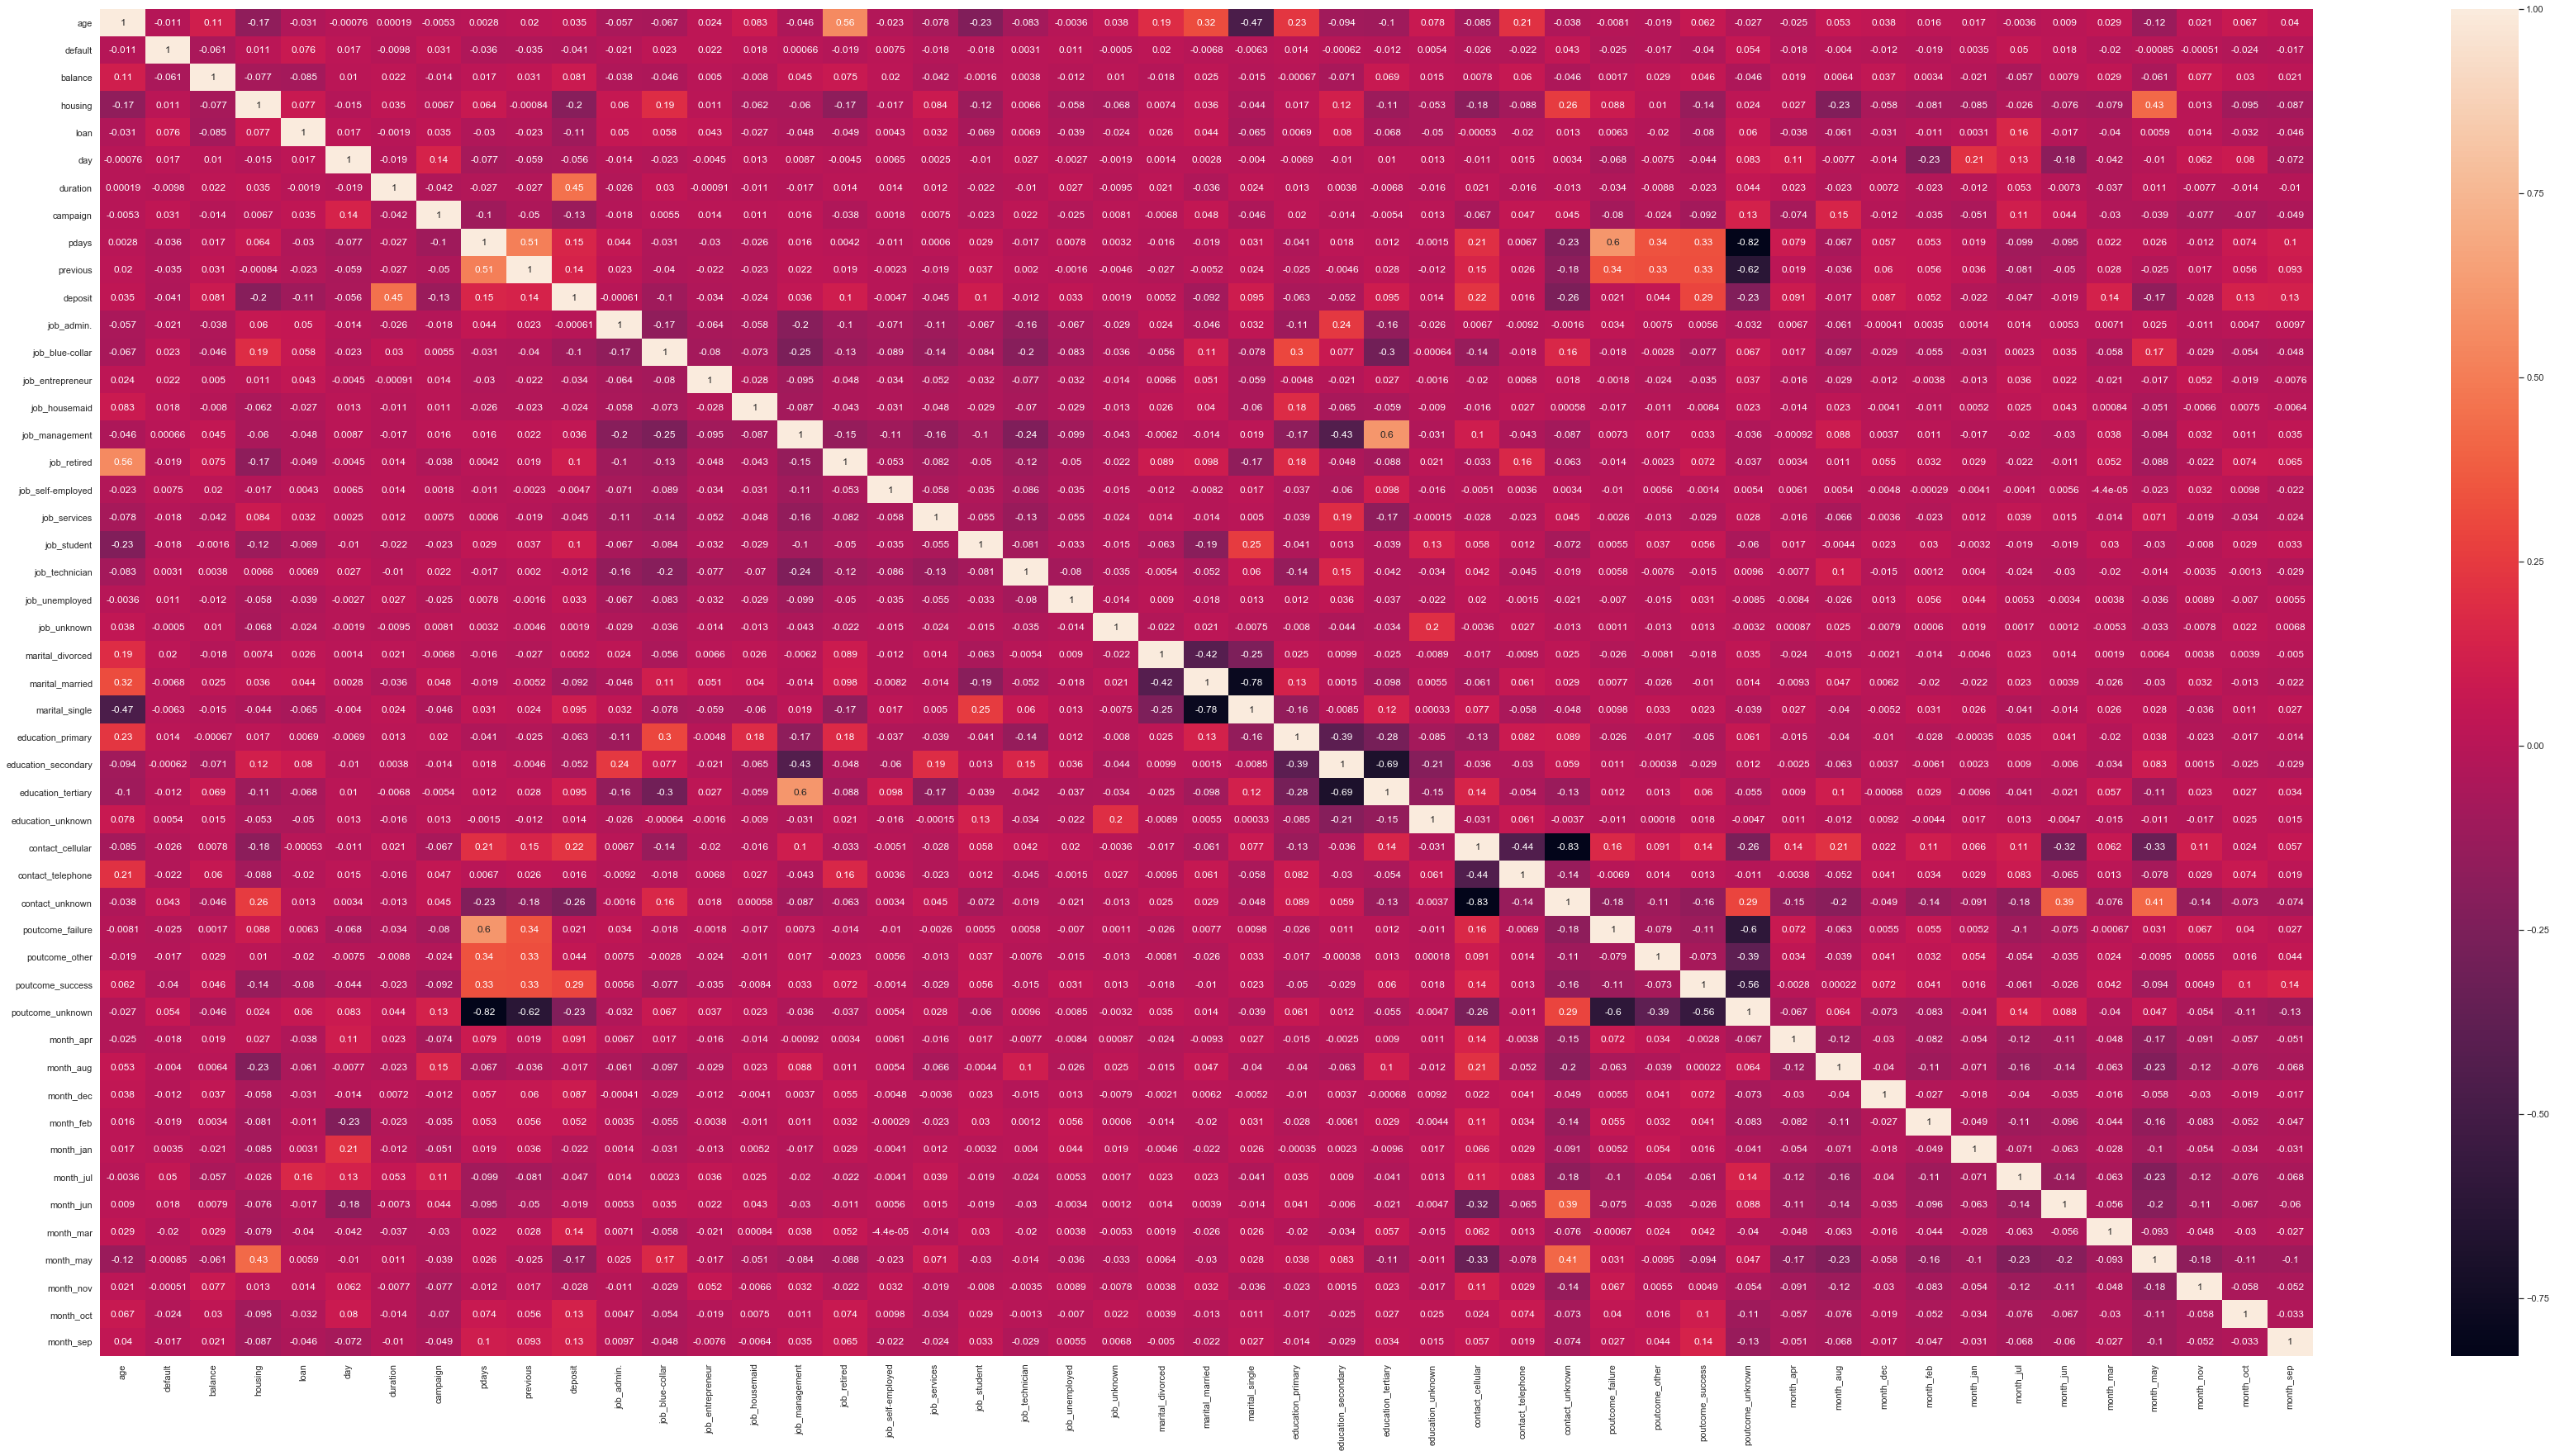

In [50]:
plt.figure(figsize=(60,30))
sns.heatmap(data_clean.corr(), annot=True)
plt.show()

In [48]:
correlation = data_clean.corr()['deposit'].sort_values(ascending=False).to_frame()
correlation

deposit
deposit              1.000000
duration             0.451919
poutcome_success     0.286642
contact_cellular     0.223252
pdays                0.151593
previous             0.139867
month_mar            0.135438
month_oct            0.133783
month_sep            0.126901
job_retired          0.103827
job_student          0.099953
marital_single       0.094632
education_tertiary   0.094598
month_apr            0.090975
month_dec            0.086964
balance              0.081129
month_feb            0.051710
poutcome_other       0.044059
job_management       0.036301
age                  0.034901
job_unemployed       0.033487
poutcome_failure     0.020714
contact_telephone    0.016420
education_unknown    0.014355
marital_divorced     0.005228
job_unknown          0.001889
job_admin.          -0.000610
job_self-employed   -0.004707
job_technician      -0.011557
month_aug           -0.016621
month_jun           -0.018982
month_jan           -0.021803
job_housemaid       -0.024155
month_nov           -0.028278
job_entrepreneur    -0.034443
default             -0.040680
job_services        -0.044531
month_jul           -0.047368
education_secondary -0.051952
day                 -0.056326
education_primary   -0.063002
marital_married     -0.092157
job_blue-collar     -0.100840
loan                -0.110580
campaign            -0.128081
month_may           -0.170507
housing             -0.203888
poutcome_unknown    -0.230470
contact_unknown     -0.256136

#### Extra Trees 

In [56]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(x,y)
clf.feature_importances_

array([0.07145749, 0.00340452, 0.07036118, 0.0292726 , 0.01540765,
       0.07318412, 0.24825619, 0.04968669, 0.01871233, 0.01337728,
       0.01016948, 0.01005545, 0.0048881 , 0.0040301 , 0.01075937,
       0.00852383, 0.00550982, 0.00792656, 0.0058886 , 0.01183156,
       0.00531561, 0.00144814, 0.0066933 , 0.01071676, 0.0093805 ,
       0.0077742 , 0.01163163, 0.01105806, 0.00553447, 0.01939047,
       0.00511882, 0.0284968 , 0.00802359, 0.00480385, 0.0443314 ,
       0.02077294, 0.01303653, 0.01250697, 0.00351457, 0.00950132,
       0.00612615, 0.01108531, 0.01336233, 0.01294391, 0.01391655,
       0.00976008, 0.01292253, 0.00813029])

In [57]:
extratrees = pd.DataFrame(clf.feature_importances_, index=x.columns, columns=['scores'])
extratrees.sort_values('scores', ascending=False)

scores
duration             0.248256
day                  0.073184
age                  0.071457
balance              0.070361
campaign             0.049687
poutcome_success     0.044331
housing              0.029273
contact_unknown      0.028497
poutcome_unknown     0.020773
contact_cellular     0.019390
pdays                0.018712
loan                 0.015408
month_may            0.013917
previous             0.013377
month_jun            0.013362
month_apr            0.013037
month_mar            0.012944
month_oct            0.012923
month_aug            0.012507
job_technician       0.011832
education_secondary  0.011632
month_jul            0.011085
education_tertiary   0.011058
job_management       0.010759
marital_married      0.010717
job_admin.           0.010169
job_blue-collar      0.010055
month_nov            0.009760
month_feb            0.009501
marital_single       0.009380
job_retired          0.008524
month_sep            0.008130
poutcome_failure     0.008024
job_services         0.007927
education_primary    0.007774
marital_divorced     0.006693
month_jan            0.006126
job_student          0.005889
education_unknown    0.005534
job_self-employed    0.005510
job_unemployed       0.005316
contact_telephone    0.005119
job_entrepreneur     0.004888
poutcome_other       0.004804
job_housemaid        0.004030
month_dec            0.003515
default              0.003405
job_unknown          0.001448

After selecting the feature with extratrees and select K best, we finally returned to selecting features based on the existing knowledge domain. In this case, we selected several features related to customers and campaigns. These features include Age, Job, Marital, Education, Default, Housing, Loan, Duration, Campaign, Previous, Poutcome. These variables actually useful information fundamentally.

In [58]:
data_clean = data_clean.drop(columns = ['pdays', 'day', 'month_jan', 'month_feb','month_mar','month_apr',
                                        'month_may','month_jun','month_jul','month_aug','month_sep','month_oct',
                                        'month_nov','month_dec','balance', 'contact_cellular', 'contact_telephone', 'contact_unknown'])
data_clean

age  default  housing  loan  duration  campaign  previous  deposit  \
0       59        0        1     0      1042         1         0        1   
1       56        0        0     0      1467         1         0        1   
2       41        0        1     0      1389         1         0        1   
3       55        0        1     0       579         1         0        1   
4       54        0        0     0       673         2         0        1   
...    ...      ...      ...   ...       ...       ...       ...      ...   
11157   33        0        1     0       257         1         0        0   
11158   39        0        0     0        83         4         0        0   
11159   32        0        0     0       156         2         0        0   
11160   43        0        0     1         9         2         5        0   
11161   34        0        0     0       628         1         0        0   

       job_admin.  job_blue-collar  ...  marital_married  marital_single  \
0               1                0  ...                1               0   
1               1                0  ...                1               0   
2               0                0  ...                1               0   
3               0                0  ...                1               0   
4               1                0  ...                1               0   
...           ...              ...  ...              ...             ...   
11157           0                1  ...                0               1   
11158           0                0  ...                1               0   
11159           0                0  ...                0               1   
11160           0                0  ...                1               0   
11161           0                0  ...                1               0   

       education_primary  education_secondary  education_tertiary  \
0                      0                    1                   0   
1                      0                    1                   0   
2                      0                    1                   0   
3                      0                    1                   0   
4                      0                    0                   1   
...                  ...                  ...                 ...   
11157                  1                    0                   0   
11158                  0                    1                   0   
11159                  0                    1                   0   
11160                  0                    1                   0   
11161                  0                    1                   0   

       education_unknown  poutcome_failure  poutcome_other  poutcome_success  \
0                      0                 0               0                 0   
1                      0                 0               0                 0   
2                      0                 0               0                 0   
3                      0                 0               0                 0   
4                      0                 0               0                 0   
...                  ...               ...             ...               ...   
11157                  0                 0               0                 0   
11158                  0                 0               0                 0   
11159                  0                 0               0                 0   
11160                  0                 1               0                 0   
11161                  0                 0               0                 0   

       poutcome_unknown  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
...                 ...  
11157                 1  
11158                 1  
11159                 1  
11160                 0  
11161                 1  

[11162 rows x 31 columns]

<Figure size 720x2160 with 0 Axes>

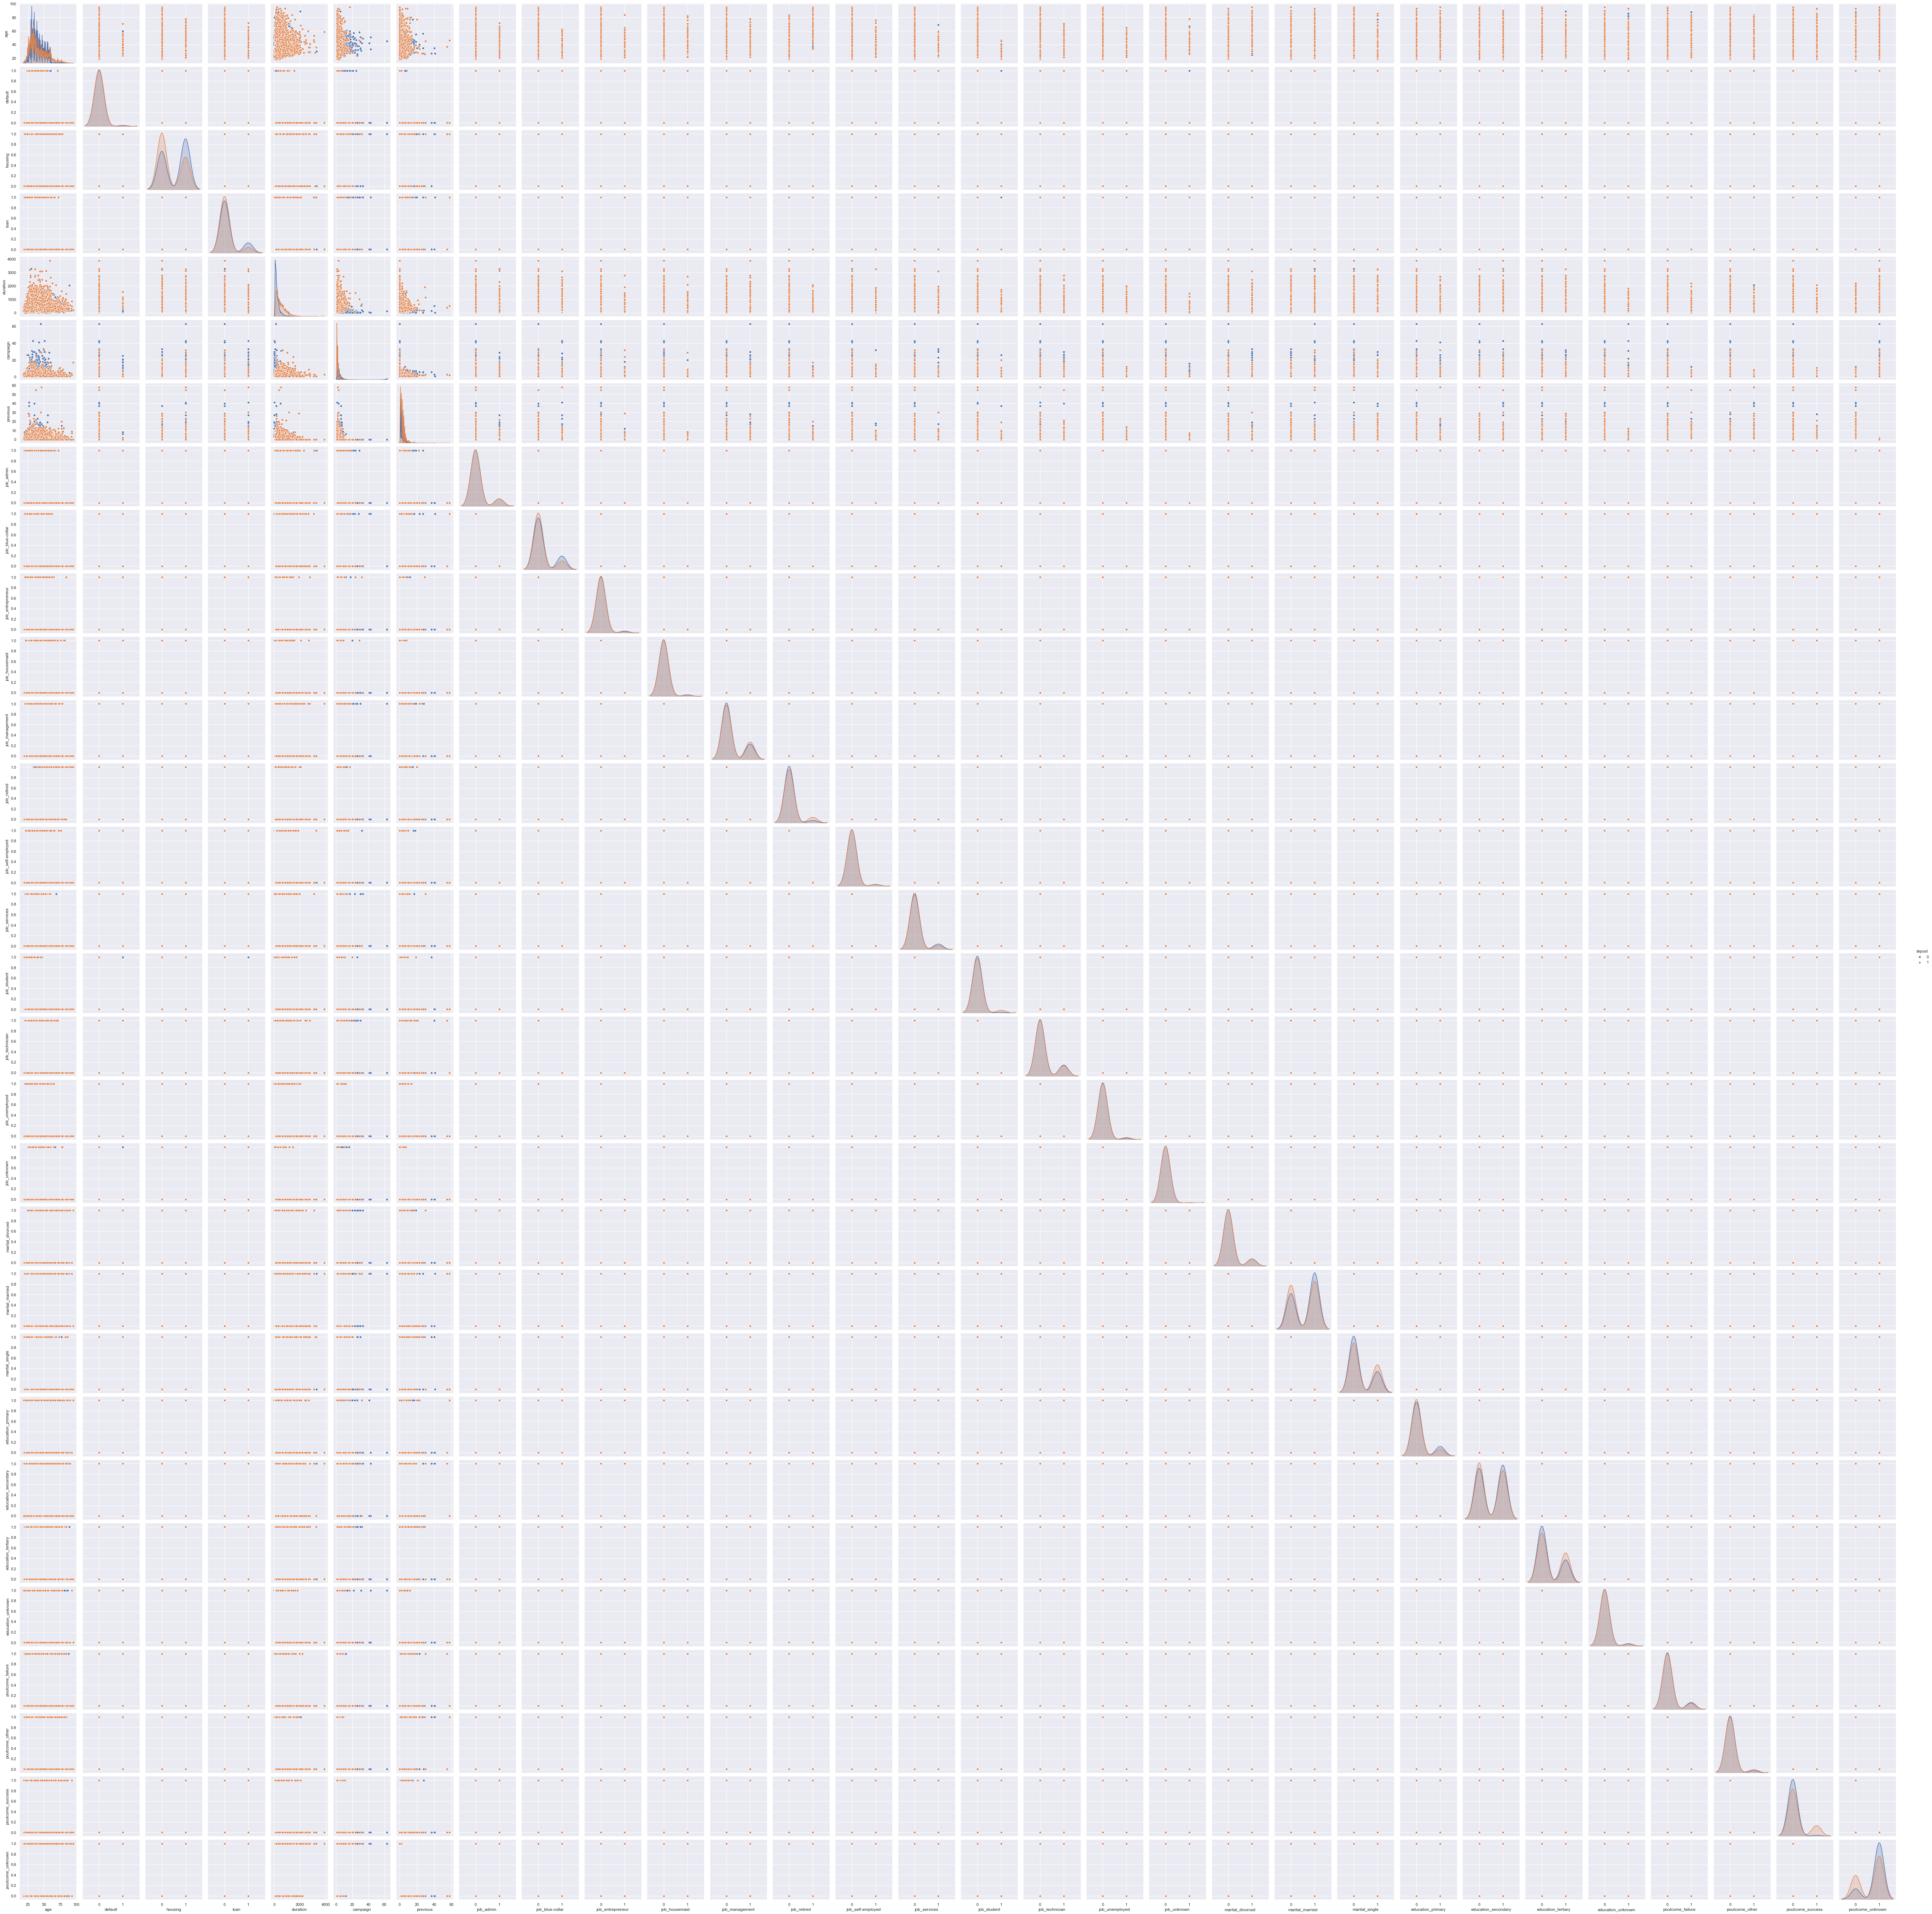

In [59]:
plt.figure(figsize=(10,30))

sns.pairplot(data_clean, hue='deposit',diag_kws={'bw': 0.2})

<hr>

### __Exporting Dataset__

In [60]:
data_clean.to_csv("data_clean.csv", index=False)